In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('framingham_heart_disease.csv')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [4]:
df = df.dropna()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3656 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             3656 non-null   int64  
 1   age              3656 non-null   int64  
 2   education        3656 non-null   float64
 3   currentSmoker    3656 non-null   int64  
 4   cigsPerDay       3656 non-null   float64
 5   BPMeds           3656 non-null   float64
 6   prevalentStroke  3656 non-null   int64  
 7   prevalentHyp     3656 non-null   int64  
 8   diabetes         3656 non-null   int64  
 9   totChol          3656 non-null   float64
 10  sysBP            3656 non-null   float64
 11  diaBP            3656 non-null   float64
 12  BMI              3656 non-null   float64
 13  heartRate        3656 non-null   float64
 14  glucose          3656 non-null   float64
 15  TenYearCHD       3656 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 485.6 KB


In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X = df.drop('TenYearCHD', axis = 1)
y = df['TenYearCHD']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state=0)

In [9]:
from sklearn.tree import DecisionTreeClassifier

In [10]:
dc = DecisionTreeClassifier()

In [11]:
dc.fit(X_train, y_train)

DecisionTreeClassifier()

In [12]:
predictions = dc.predict(X_test)

In [13]:
from sklearn.metrics import classification_report, confusion_matrix

In [14]:
print(confusion_matrix(predictions, y_test))
print('\n')
print(classification_report(predictions, y_test))

[[664  97]
 [116  37]]


              precision    recall  f1-score   support

           0       0.85      0.87      0.86       761
           1       0.28      0.24      0.26       153

    accuracy                           0.77       914
   macro avg       0.56      0.56      0.56       914
weighted avg       0.76      0.77      0.76       914



In [15]:
from sklearn.ensemble import RandomForestClassifier

In [16]:
rc = RandomForestClassifier(n_estimators = 100)

In [17]:
rc.fit(X_train, y_train)

RandomForestClassifier()

In [18]:
pred = rc.predict(X_test)

In [19]:
print(confusion_matrix(pred, y_test))
print('\n')
print(classification_report(pred, y_test))

[[775 128]
 [  5   6]]


              precision    recall  f1-score   support

           0       0.99      0.86      0.92       903
           1       0.04      0.55      0.08        11

    accuracy                           0.85       914
   macro avg       0.52      0.70      0.50       914
weighted avg       0.98      0.85      0.91       914



In [20]:
df1 = pd.read_csv('superstore_data.csv')

In [21]:
df1.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,...,11,0,34,2,3,1,2,7,1,0


In [22]:
df1['Response'].unique()

array([1, 0], dtype=int64)

In [23]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [24]:
df1 = df1.dropna()

In [25]:
df1 = df1.drop('Education', axis = 1)

In [26]:
df1 = df1.drop('Marital_Status', axis = 1)

In [27]:
df1 = df1.drop('Dt_Customer', axis = 1)

In [28]:
X = df1.drop('Response', axis = 1)
y = df1['Response']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state=101)

In [30]:
clf = dc.fit(X_train, y_train)

In [31]:
predi = dc.predict(X_test)

In [32]:
print(confusion_matrix(predi, y_test))
print('\n')
print(classification_report(predi, y_test))

[[505  57]
 [ 67  36]]


              precision    recall  f1-score   support

           0       0.88      0.90      0.89       562
           1       0.39      0.35      0.37       103

    accuracy                           0.81       665
   macro avg       0.63      0.62      0.63       665
weighted avg       0.81      0.81      0.81       665



In [33]:
rc.fit(X_train, y_train)

RandomForestClassifier()

In [34]:
predictt = rc.predict(X_test)

In [35]:
print(confusion_matrix(predictt, y_test))
print('\n')
print(classification_report(predictt, y_test))

[[559  70]
 [ 13  23]]


              precision    recall  f1-score   support

           0       0.98      0.89      0.93       629
           1       0.25      0.64      0.36        36

    accuracy                           0.88       665
   macro avg       0.61      0.76      0.64       665
weighted avg       0.94      0.88      0.90       665



In [38]:
from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz
import pydot 
from sklearn import tree

In [39]:
features = list(df1.drop('Response', axis = 1))

In [40]:
features

['Id',
 'Year_Birth',
 'Income',
 'Kidhome',
 'Teenhome',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'Complain']

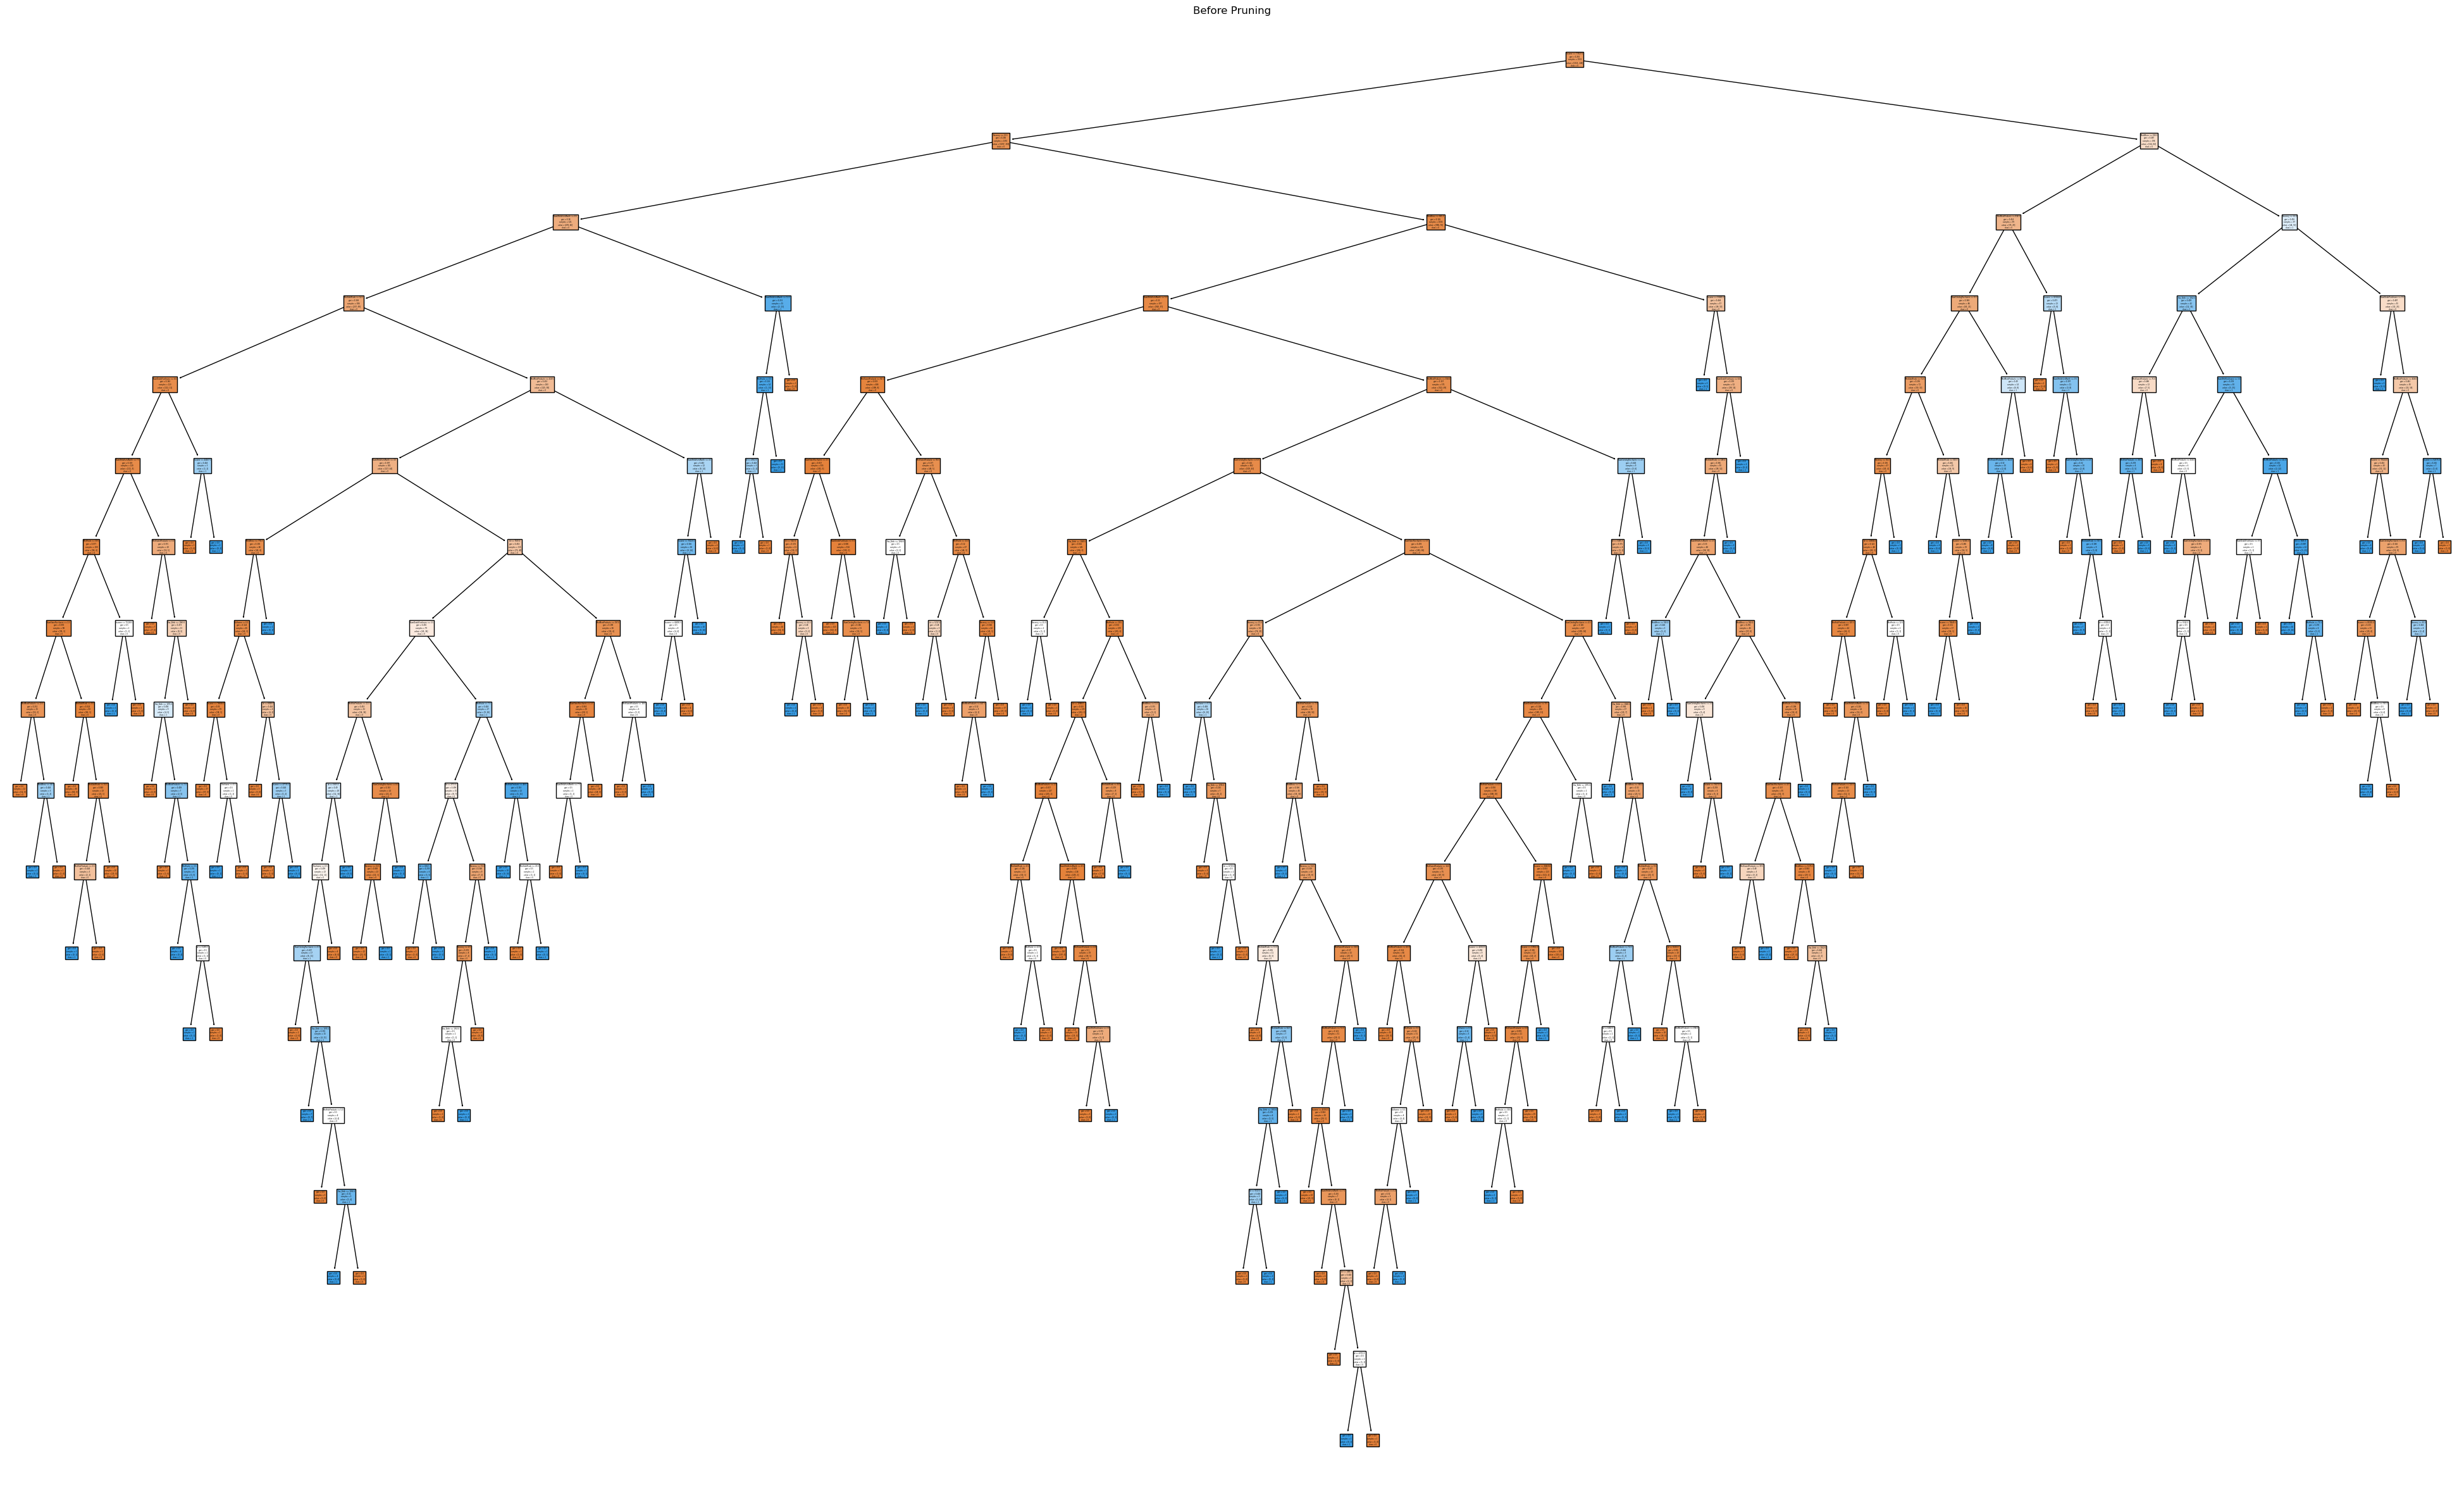

In [41]:
classes = ['0', '1']
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (50,30))
tree.plot_tree(clf, feature_names = features, class_names = classes, filled = True)
plt.title("Before Pruning")
plt.show()

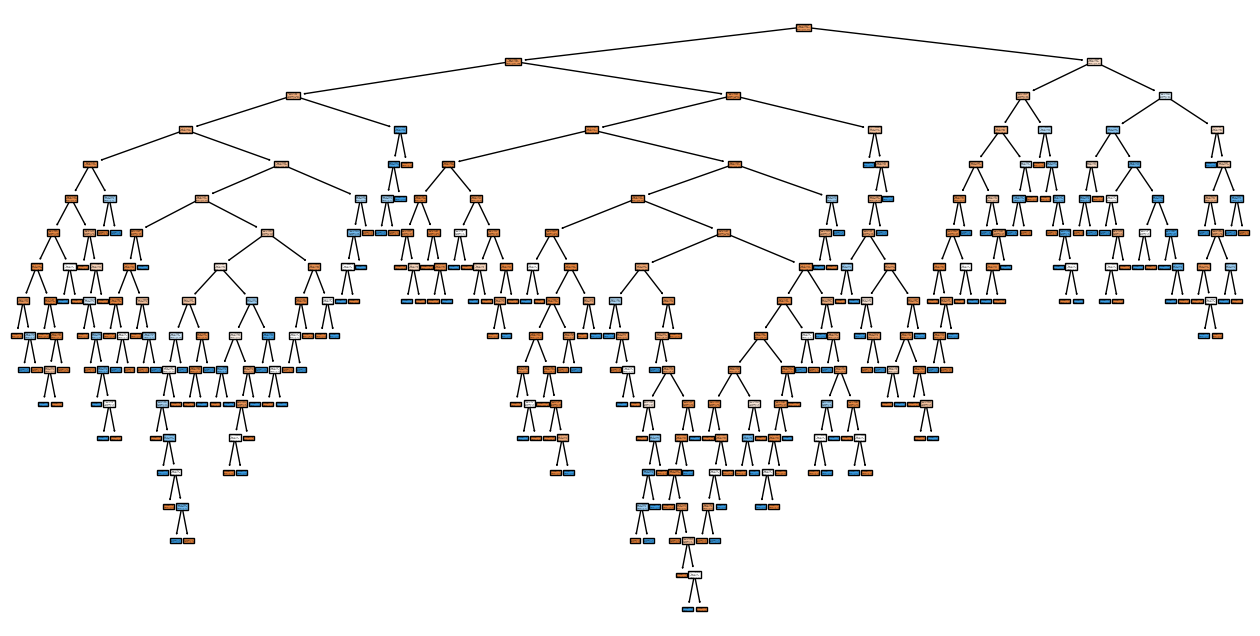

In [42]:
plt.figure(figsize=(16,8))
tree.plot_tree(clf, filled = True)
plt.show()

In [43]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
params = {'max_depth' : [2,4,6,8,10,12], 'min_samples_split' : [2,3,4], 'min_samples_leaf' : [1,2]}
clf = tree.DecisionTreeClassifier()
gcv = GridSearchCV(estimator = clf, param_grid = params)
gcv.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3, 4]})

In [44]:
model = gcv.best_estimator_
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

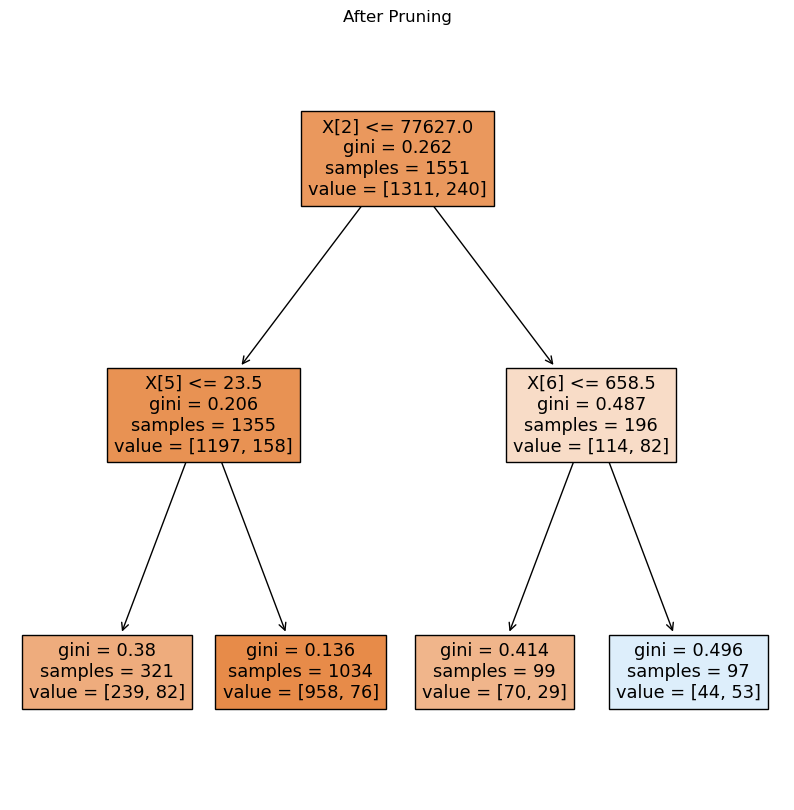

In [45]:
plt.figure(figsize = (10, 10))
#features = X
#classes = ['0', '1']
tree.plot_tree(model, filled = True)
plt.title("After Pruning")
plt.show()